<a href="https://colab.research.google.com/github/SalikFillah/Case-Study-03-Data-Mining_Kelompok-3/blob/main/Case-Study-03-Data-Mining_Kelompok%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


%matplotlib inline
plt.style.use('bmh'); sns.set()

In [ ]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/SalikFillah/Case-Study-03-Data-Mining_Kelompok-3/main/data%20cs%203.csv
df = pd.read_csv("data/data cs 3.csv", low_memory = False, encoding='utf8')
df.shape

mkdir: cannot create directory ‘data’: File exists
--2022-10-26 02:33:50--  https://raw.githubusercontent.com/SalikFillah/Case-Study-03-Data-Mining_Kelompok-3/main/data%20cs%203.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2167 (2.1K) [text/plain]
Saving to: ‘data/data cs 3.csv.4’

data cs 3.csv.4     100%[===================>]   2.12K  --.-KB/s    in 0s      

2022-10-26 02:33:50 (30.4 MB/s) - ‘data/data cs 3.csv.4’ saved [2167/2167]



(56, 7)

In [ ]:
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,7/1/2022,Mr. A,1.0,Roti,Sri Roti,2
1,1,7/1/2022,Mr. A,2.0,Air Minum,Aquos,1
2,1,7/1/2022,Mr. A,11.0,Mie Instan,Indomi,2
3,1,7/1/2022,Mr. A,12.0,Mie Instan,Mi Sedap,1
4,2,7/1/2022,Mr. B,2.0,Air Minum,Aquos,1


##Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID Transaksi  56 non-null     int64  
 1   Tanggal       56 non-null     object 
 2   Konsumen      56 non-null     object 
 3   ID Produk     56 non-null     float64
 4   Nama Produk   56 non-null     object 
 5   Merek         56 non-null     object 
 6   Jumlah        56 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ KB


In [ ]:
df['Tanggal'].sample(5)

45    7/7/2022
39    7/6/2022
0     7/1/2022
30    7/5/2022
1     7/1/2022
Name: Tanggal, dtype: object

In [ ]:
df['ID Produk'] = df['ID Produk'].astype('Int64')
df['Konsumen'] = df['Konsumen'].astype('category')
df['Nama Produk'] = df['Nama Produk'].astype('category')
df['Merek'] = df['Merek'].astype('category')

In [ ]:
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,7/1/2022,Mr. A,1,Roti,Sri Roti,2
1,1,7/1/2022,Mr. A,2,Air Minum,Aquos,1
2,1,7/1/2022,Mr. A,11,Mie Instan,Indomi,2
3,1,7/1/2022,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,7/1/2022,Mr. B,2,Air Minum,Aquos,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID Transaksi  56 non-null     int64   
 1   Tanggal       56 non-null     object  
 2   Konsumen      56 non-null     category
 3   ID Produk     56 non-null     Int64   
 4   Nama Produk   56 non-null     category
 5   Merek         56 non-null     category
 6   Jumlah        56 non-null     int64   
dtypes: Int64(1), category(3), int64(2), object(1)
memory usage: 3.2+ KB


In [ ]:
df.isnull().sum()

ID Transaksi    0
Tanggal         0
Konsumen        0
ID Produk       0
Nama Produk     0
Merek           0
Jumlah          0
dtype: int64

In [ ]:
df2 = pd.crosstab(df.Konsumen, df.Konsumen).sum()
print(df2)

Konsumen
Mr. A     6
Mr. B    15
Mr. C     3
Mr. D     3
Mr. F     1
Mr. G     4
Mr. J     1
Mr. P     2
Mr. T     3
Mr. X    13
Mr. Z     2
Mr.Y      3
dtype: int64


kami menggunakan sampel dari Mr. X dan Mr. B karena dilihat dari banyaknya pembelian

In [ ]:
basket = df[(df['Konsumen'] == 'Mr. X') | (df['Konsumen'] == 'Mr. B')]
basket

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
4,2,7/1/2022,Mr. B,2,Air Minum,Aquos,1
5,2,7/1/2022,Mr. B,6,Snack,Chiki,2
6,2,7/1/2022,Mr. B,3,Roti,Prambanan,1
7,2,7/1/2022,Mr. B,5,Shampoo,Clean,1
11,4,7/2/2022,Mr. B,1,Roti,Sri Roti,2
12,4,7/2/2022,Mr. B,10,Air Minum,Sprit,2
13,4,7/2/2022,Mr. B,8,Snack,Citata,3
14,4,7/2/2022,Mr. B,7,Sabun,Luks,1
15,4,7/2/2022,Mr. B,12,Mie Instan,Mi Sedap,2
23,8,7/4/2022,Mr. B,6,Snack,Chiki,1


In [ ]:
# Group the transaction
basket = basket.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket.head()

4     1
5     2
6     1
7     1
11    2
12    2
13    3
14    1
15    2
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
42    1
43    2
44    1
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
2,1,0,0,1,0,1,2
4,2,2,0,2,1,0,3
8,0,3,0,0,1,1,1
9,1,2,1,2,1,0,2
13,1,0,0,1,0,0,2


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
2,1,0,0,1,0,1,1
4,1,1,0,1,1,0,1
8,0,1,0,0,1,1,1
9,1,1,1,1,1,0,1
13,1,0,0,1,0,0,1


In [ ]:
basket_sets.columns

Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='Nama Produk')

In [ ]:
basket_sets.index

Int64Index([2, 4, 8, 9, 13, 17, 18], dtype='int64', name='ID Transaksi')

In [ ]:
basket_sets.iloc[0]

Nama Produk
Air Minum     1
Mie Instan    0
Rokok         0
Roti          1
Sabun         0
Shampoo       1
Snack         1
Name: 2, dtype: int64

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.857143,(Air Minum)
9,0.857143,"(Roti, Air Minum)"
3,0.857143,(Roti)
6,0.857143,(Snack)
36,0.714286,"(Roti, Air Minum, Snack)"
...,...,...
44,0.142857,"(Shampoo, Sabun, Mie Instan)"
46,0.142857,"(Shampoo, Mie Instan, Snack)"
47,0.142857,"(Roti, Sabun, Rokok)"
48,0.142857,"(Roti, Rokok, Snack)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
597,(Rokok),"(Sabun, Mie Instan, Snack, Roti, Air Minum)",0.142857,0.285714,0.142857,1.00,3.50,0.102041,inf
211,(Rokok),"(Air Minum, Mie Instan, Snack)",0.142857,0.285714,0.142857,1.00,3.50,0.102041,inf
165,"(Roti, Rokok)","(Sabun, Mie Instan, Air Minum)",0.142857,0.285714,0.142857,1.00,3.50,0.102041,inf
166,"(Air Minum, Rokok)","(Roti, Sabun, Mie Instan)",0.142857,0.285714,0.142857,1.00,3.50,0.102041,inf
171,(Rokok),"(Roti, Sabun, Mie Instan, Air Minum)",0.142857,0.285714,0.142857,1.00,3.50,0.102041,inf
...,...,...,...,...,...,...,...,...,...
10,(Sabun),"(Roti, Snack)",0.571429,0.714286,0.428571,0.75,1.05,0.020408,1.142857
9,"(Roti, Snack)",(Sabun),0.714286,0.571429,0.428571,0.60,1.05,0.020408,1.071429
22,(Sabun),"(Roti, Air Minum, Snack)",0.571429,0.714286,0.428571,0.75,1.05,0.020408,1.142857
30,(Sabun),"(Air Minum, Snack)",0.571429,0.714286,0.428571,0.75,1.05,0.020408,1.142857


Berdasarkan output di atas dapat ditarik kesimpulan bahwa produk-produk yang dibeli secara bersamaaan oleh customer di alfaindo

In [ ]:
# Filtering
rules[ (rules['lift'] >= 3.00) & (rules['confidence'] >= 0.75)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
597,(Rokok),"(Sabun, Mie Instan, Snack, Roti, Air Minum)",0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
211,(Rokok),"(Air Minum, Mie Instan, Snack)",0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
165,"(Roti, Rokok)","(Sabun, Mie Instan, Air Minum)",0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
166,"(Air Minum, Rokok)","(Roti, Sabun, Mie Instan)",0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
171,(Rokok),"(Roti, Sabun, Mie Instan, Air Minum)",0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
177,"(Roti, Rokok)","(Air Minum, Mie Instan)",0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
179,"(Air Minum, Rokok)","(Roti, Mie Instan)",0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
184,(Rokok),"(Roti, Air Minum, Mie Instan)",0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
193,"(Sabun, Rokok)","(Air Minum, Mie Instan)",0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
197,(Rokok),"(Air Minum, Sabun, Mie Instan)",0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf


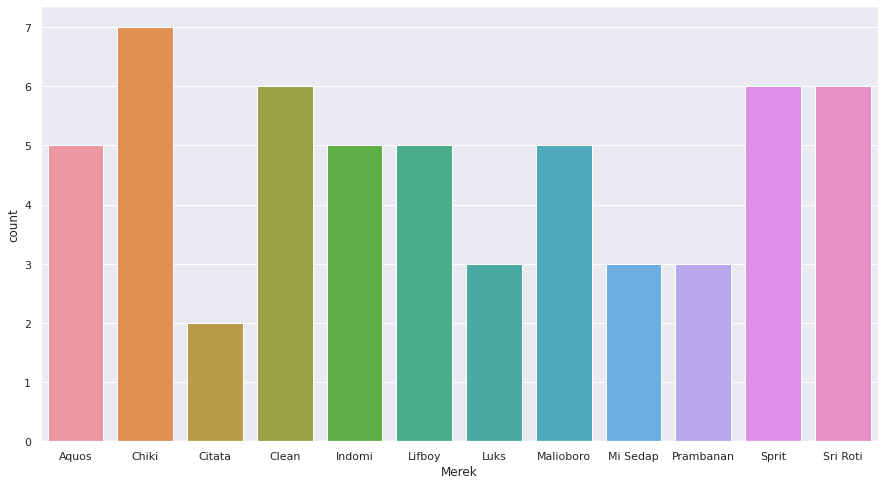

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Merek')